### Making all of the needed Imports 

1. Predict whether a booking will be cancelled or not
    * **Using the Decision Tree Classifier**

In [ ]:
# I will add my code here

2. Classify the hotel type (*resort or city*) based on booking patterns
    * **Using the Naive Bayes** 

(119390, 32)
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Depo

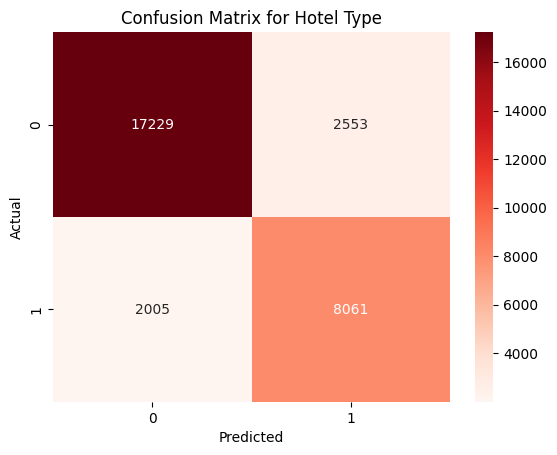

Classification Report for Hotel Type:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     19782
           1       0.76      0.80      0.78     10066

    accuracy                           0.85     29848
   macro avg       0.83      0.84      0.83     29848
weighted avg       0.85      0.85      0.85     29848



In [17]:
# Code will be added here 
# Loading the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv('hotel_bookings.csv')
print(df.shape) # so that we're able to see how mant rows and columns we are working with 
print(df.head())

# here i am handling some of the missing values
df['children'].fillna(0, inplace=True)
df['company'].fillna(0, inplace=True)
df['agent'].fillna(0, inplace=True)

# dropping columns that are not necessary for analysis
df.drop(columns=['reservation_status', 'reservation_status_date'], inplace=True)

# converting months into numerical format
# this helps the model undersrand the chronological order of months
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
df['arrival_date_month'] = df['arrival_date_month'].map(month_mapping)

# encoding categorical variables or columns 
categorical_cols = ['meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type']

# this is added because machine learning models can't handle text directly and this converts them into numerical format
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

df['agent'] = df['agent'].astype(float)
df['company'] = df['company'].astype(float)

# defining the features and target variable
X = df.drop('hotel', axis=1)    
y = df['hotel']  # 'hotel' is the target variable

# encoding target labels 
y = LabelEncoder().fit_transform(y) 

# splitting the dataset into training and testing sets
# learned in class that 25% test size is a good balance for a realistic evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Training the Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Making predictions
y_pred = nb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Hotel Type: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Hotel Type')
plt.show()

report = classification_report(y_test, y_pred)
print('Classification Report for Hotel Type:')
print(report)